# 文献案例｜决策树（Decision Tree）在材料学中的应用

决策树（DecisionTree）是一种非参数的有监督学习方法，它能够从一系列有特征和标签的数据中总结出决策规则，并用树状图的结构来呈现这些规则，以解决分类和回归问题。决策树算法容易理解，适用各种数据，在解决各种问题时都有良好表现，尤其是以树模型为核心的各种集成算法，在各个行业和领域都有广泛的应用。

**AIMS：**
* 掌握如何使用 sklearn 建立决策树模型，理解参数、属性、接口
    * 分类树重要属性和参数｜建立一棵树
    * 回归树剪枝与可视化
* 通过绘制决策树图

Reference:
1. Suwarno, S.; Dicky, G.; Suyuthi, A.; Effendi, M.; Witantyo, W.; Noerochim, L.; Ismail, M. Machine Learning Analysis of Alloying Element Effects on Hydrogen Storage Properties of AB2 Metal Hydrides. Int. J. Hydrogen Energy 2022, 47 (23), 11938–11947. https://doi.org/10.1016/j.ijhydene.2022.01.210.

## 案例背景

向清洁和可持续能源的过渡以克服对日益稀缺的化石燃料的依赖，是可持续发展的基础。氢能是一种很有前途的能源载体，可以燃料电池的形式转化为电能。氢的能量密度约为 142 MJ/kg，大大高于标准化石燃料（47 MJ/kg），同时在燃烧过程中只产生水蒸气作为副产品，清洁无污染。然而，需要储氢设备来向燃料电池供应氢，这限制了氢能的应用。轻型燃料电池汽车需要大约 4 kg 的氢气才能行驶 400 公里。但在环境温度和大气压下，1 千克气体形式的氢气将占据$11\ m^3$的体积。因此，目前正进行许多研究以实现高容量储氢。

常用的储氢方法有高压气瓶储氢、低温液态储氢和固体储氢材料。高压气瓶储氢具有最高的储氢容量，但需要在非常高的压力（800 bar）下可用，这带来了安全问题，低温液态储氢同样不适合在室温下使用。相比之下，储氢合金可吸收氢气形成金属氢化物，其在晶格间隙位置上吸收的氢能够在室温和大气压下储存，同时又兼具有较高的储氢容量，因而成为有前途的储氢方式。

金属氢化物可分为离子氢化物、共价氢化物和金属间氢化物。金属间氢化物被认为是其中最有前途的储氢材料。金属间氢化物被表征为五个金属氢化物家族，即 A、A2B、AB、AB2 和 AB5。在这些家族中，AB2 金属氢化物显示出突出的储氢和电池应用的潜力。其中元素 A 可由第 4 族元素（Ti、Zr 和 Hf）或镧系元素（La、Ce 和 Pr）形成，而 B 可由过渡和非过渡金属形成，如 V、Cr、Mn 和 Fe。AB2 合金结晶为立方 C14 或六方 C15 结构的 Laves 相晶体。这取决于合金成分，特别是元素的外部电子密度和原子尺寸。立方相因具有更高的晶格空隙率，一般具有更高的储氢容量。

在这里，我们收集并整理了 1998 年至 2019 年发表的储氢合金储氢容量研究的数据。建立了 ML 模型，将 AB2 合金的化学组成与储氢性质联系起来，即生成热（Delta H）、立方相丰度 （C14）和氢重量百分比（wt%H）。该模型旨在获得合金元素在储氢性能中的作用的新见解，并可用于研究人员指导他们的实验工作。

## 数据集介绍
本数据集针对 AB2 合金金属氢化物的储氢性能，首先提供了 314 个不同合金的储氢性质数据。这些数据包含在文件 “AB2_Hydrogen.xlsx" 表中。 表第一列为记录序号，第二列为数据来源参考文献的序号，第 3~24 列给出了吸氢合金各元素 (Ti, Zr, Mn, Co, Cr, V, Ni, Sn, Al, C, Mg, Gd, Fe, B, Cu,Mo, W, La, Si, Nb, Ce, Y) 含量（原子比例），第 25 ，26 列给出了该金属氢化物反应的生成热（Delta H）和焓变（Delta S）；第 27 ，28 列给出了该金属氢化物反应的立方相丰度 （C14）和六方相丰度 （C15）。第 29 列给出了氢重量百分比（wt%H）。第 30 列给出了参考文献来源。

## 2 DecisionTreeClassifier

*class*`sklearn.tree.DecisionTreeClassifier`(*criterion=’gini’*, *splitter=’best’*, *max_depth=None*, *min_samples_split=2*, *min_samples_leaf=1*, *min_weight_fraction_leaf=0.0*, *max_features=None*, *random_state=None*, *max_leaf_nodes=None*, *min_impurity_decrease=0.0*, *min_impurity_split=None*, *class_weight=None*, *presort=False*)

### 2.1 重要参数

#### 2.1.1 criterion

为了要将表格转化为一棵树，决策树需要找出最佳节点和最佳的分枝方法，对分类树来说，衡量这个“最佳”的指标叫做“不纯度”。通常来说，不纯度越低，决策树对训练集的拟合越好。现在使用的决策树算法在分枝方法上的核心大多是围绕在对某个不纯度相关指标的最优化上。

不纯度基于节点来计算，树中的每个节点都会有一个不纯度，并且子节点的不纯度一定是低于父节点的，也就是说，在同一棵决策树上，叶子节点的不纯度一定是最低的。

Criterion这个参数正是用来决定不纯度的计算方法的。sklearn提供了两种选择：

1）输入”entropy“，使用**信息熵**（Entropy）
$$
\operatorname{Entropy}(t)=-\sum_{i=0}^{c-1} p(i \mid t) \log _2 p(i \mid t)
$$
2）输入”gini“，使用**基尼系数**（Gini Impurity）
$$
G i n i(t)=1-\sum_{i=0}^{c-1} p(i \mid t)^2
$$
其中$t$代表给定的节点，$i$代表标签的任意分类，$p(i \mid t)$代表标签分类$i$在节点$t$上所占的比例。注意，当使用信息熵时，sklearn 实际计算的是基于信息熵的信息增益(Information Gain)，即父节点的信息熵和子节点的信息熵之差。

比起基尼系数，信息熵对不纯度更加敏感，对不纯度的惩罚最强。但是 **在实际使用中，信息熵和基尼系数的效果基本相同。** 信息熵的计算比基尼系数缓慢一些，因为基尼系数的计算不涉及对数。另外，因为信息熵对不纯度更加敏感，所以信息熵作为指标时，决策树的生长会更加“精细”，因此对于高维数据或者噪音很多的数据，信息熵很容易过拟合，基尼系数在这种情况下效果往往比较好。当然，这不是绝对的。

| 参数               | criterion                                                    |
| ------------------ | ------------------------------------------------------------ |
| 如何影响模型?      | 确定不纯度的计算方法，帮忙找出最佳节点和最佳分枝，不纯度越低，决策树对训练集的拟合越好 |
| 可能的输入有哪些？ | 不填默认基尼系数，填写gini使用基尼系数，填写entropy使用信息增益 |
| 怎样选取参数？     | 通常就使用基尼系数，数据维度很大，噪音很大时使用基尼系数 维度低，数据比较清晰的时候，信息熵和基尼系数没区别 当决策树的拟合程度不够的时候，使用信息熵 两个都试试，不好就换另外一个 |

决策树的基本流程简单概括如下：

1. 计算全部特征的不纯度指标 →
2. 选取不纯度指标最优的特征来分枝 → 
3. 进行第一个特征分枝后，计算全部特征的不纯度指标 → 
4. 选取不纯度指标最优的特征继续分枝……

##### 动手建立一棵树

1. 导入数据集和需要的模块

In [1]:
# 导入需要的模块和数据集
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 消除警告
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.model_selection import train_test_split

df = pd.read_csv('AB2_Hydrogen_Storage_Alloys.csv')
df

,Journal,Ti,Zr,Mn,Co,Cr,V,Ni,Sn,Al,...,Ce,Y,B,A,B/A,ΔH,ΔS,C14,C15,wt%
0,1,1.000000,0.000000,0.850000,0.000000,1.000000,0.050000,0.000000,0.0,0.000000,...,0.0,0.0,2.0,1.0,2.0,14.70,93.7,100.0,0.0,NaN
1,1,1.000000,0.000000,0.700000,0.000000,1.000000,0.100000,0.000000,0.0,0.000000,...,0.0,0.0,2.0,1.0,2.0,17.70,101.0,100.0,0.0,NaN
2,1,1.000000,0.000000,0.550000,0.000000,1.000000,0.150000,0.000000,0.0,0.000000,...,0.0,0.0,2.0,1.0,2.0,18.60,99.9,100.0,0.0,NaN
3,1,1.000000,0.000000,0.400000,0.000000,1.000000,0.200000,0.000000,0.0,0.000000,...,0.0,0.0,2.0,1.0,2.0,20.20,103.0,100.0,0.0,NaN
4,1,0.959596,0.040404,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,2.0,1.0,2.0,15.10,93.0,100.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,50,0.357798,0.642202,0.132653,0.132653,0.125000,0.173469,0.522959,0.0,0.017857,...,0.0,0.0,2.0,1.0,2.0,36.82,110.0,0.0,0.0,1.27
310,50,0.356863,0.643137,0.163539,0.163539,0.152815,0.214477,0.640751,0.0,0.021448,...,0.0,0.0,2.0,1.0,2.0,36.72,110.0,0.0,0.0,1.33
311,50,0.358650,0.641350,0.146982,0.146982,0.139108,0.194226,0.577428,0.0,0.018373,...,0.0,0.0,2.0,1.0,2.0,37.03,110.0,0.0,0.0,1.38
312,50,0.360784,0.639216,0.163539,0.166220,0.155496,0.214477,0.651475,0.0,0.021448,...,0.0,0.0,2.0,1.0,2.0,34.83,110.0,0.0,0.0,1.24


数据预处理：删除数据量过少的元素

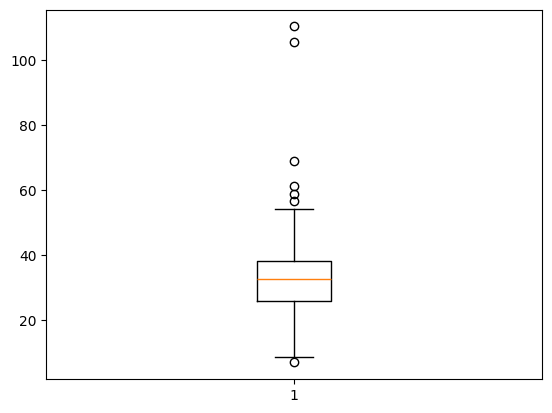

In [2]:
plt.boxplot(df['ΔH'])
plt.show()

In [3]:
df.keys()

Index(['Journal', 'Ti', 'Zr', 'Mn', 'Co', 'Cr', 'V', 'Ni', 'Sn', 'Al', 'C',
       'Mg', 'Gd', 'Fe', 'B (Boron)', 'Cu', 'Mo', 'W', 'La', 'Si', 'Nb', 'Ce',
       'Y', 'B', 'A', 'B/A', 'ΔH', 'ΔS', 'C14', 'C15', 'wt%'],
      dtype='object')

In [4]:
threshold = 40  # 根据分析结果设置阈值为 40
df.loc[df['ΔH'] >= threshold, 'exothermic'] = 1  # 根据吸附焓对材料进行二分类
df.loc[df['ΔH'] < threshold, 'exothermic'] = 0  # 根据吸附焓对材料进行二分类
df

,Journal,Ti,Zr,Mn,Co,Cr,V,Ni,Sn,Al,...,Y,B,A,B/A,ΔH,ΔS,C14,C15,wt%,exothermic
0,1,1.000000,0.000000,0.850000,0.000000,1.000000,0.050000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,14.70,93.7,100.0,0.0,NaN,0.0
1,1,1.000000,0.000000,0.700000,0.000000,1.000000,0.100000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,17.70,101.0,100.0,0.0,NaN,0.0
2,1,1.000000,0.000000,0.550000,0.000000,1.000000,0.150000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,18.60,99.9,100.0,0.0,NaN,0.0
3,1,1.000000,0.000000,0.400000,0.000000,1.000000,0.200000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,20.20,103.0,100.0,0.0,NaN,0.0
4,1,0.959596,0.040404,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,15.10,93.0,100.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,50,0.357798,0.642202,0.132653,0.132653,0.125000,0.173469,0.522959,0.0,0.017857,...,0.0,2.0,1.0,2.0,36.82,110.0,0.0,0.0,1.27,0.0
310,50,0.356863,0.643137,0.163539,0.163539,0.152815,0.214477,0.640751,0.0,0.021448,...,0.0,2.0,1.0,2.0,36.72,110.0,0.0,0.0,1.33,0.0
311,50,0.358650,0.641350,0.146982,0.146982,0.139108,0.194226,0.577428,0.0,0.018373,...,0.0,2.0,1.0,2.0,37.03,110.0,0.0,0.0,1.38,0.0
312,50,0.360784,0.639216,0.163539,0.166220,0.155496,0.214477,0.651475,0.0,0.021448,...,0.0,2.0,1.0,2.0,34.83,110.0,0.0,0.0,1.24,0.0


In [5]:
df.iloc[:, 1:23] == 0

,Ti,Zr,Mn,Co,Cr,V,Ni,Sn,Al,C,...,Fe,B (Boron),Cu,Mo,W,La,Si,Nb,Ce,Y
0,False,True,False,True,False,False,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
1,False,True,False,True,False,False,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
2,False,True,False,True,False,False,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
3,False,True,False,True,False,False,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,False,True,True,True,True
310,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,False,True,True,True,True
311,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,False,True,True,True,True
312,False,False,False,False,False,False,False,True,False,True,...,True,True,True,True,True,False,True,True,True,True


In [6]:
sums = (df.iloc[:, 1:23]==0).astype(int).sum(axis=0)  # 统计不含某种元素的化合物的个数
print(sums)

Ti            30
Zr            38
Mn            53
Co           178
Cr            82
V             95
Ni           156
Sn           225
Al           203
C            313
Mg           308
Gd           313
Fe           207
B (Boron)    305
Cu           309
Mo           304
W            311
La           298
Si           309
Nb           312
Ce           313
Y            290
dtype: int64


In [7]:
sums[sums > sums['Y']].index

Index(['C', 'Mg', 'Gd', 'B (Boron)', 'Cu', 'Mo', 'W', 'La', 'Si', 'Nb', 'Ce'], dtype='object')

In [8]:
sums_result = list(sums[sums > sums['Y']].index)  # 筛选出数据量过少的元素
print(sums_result)
df = df.drop(sums_result, axis=1)
df

['C', 'Mg', 'Gd', 'B (Boron)', 'Cu', 'Mo', 'W', 'La', 'Si', 'Nb', 'Ce']


,Journal,Ti,Zr,Mn,Co,Cr,V,Ni,Sn,Al,...,Y,B,A,B/A,ΔH,ΔS,C14,C15,wt%,exothermic
0,1,1.000000,0.000000,0.850000,0.000000,1.000000,0.050000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,14.70,93.7,100.0,0.0,NaN,0.0
1,1,1.000000,0.000000,0.700000,0.000000,1.000000,0.100000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,17.70,101.0,100.0,0.0,NaN,0.0
2,1,1.000000,0.000000,0.550000,0.000000,1.000000,0.150000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,18.60,99.9,100.0,0.0,NaN,0.0
3,1,1.000000,0.000000,0.400000,0.000000,1.000000,0.200000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,20.20,103.0,100.0,0.0,NaN,0.0
4,1,0.959596,0.040404,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,15.10,93.0,100.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,50,0.357798,0.642202,0.132653,0.132653,0.125000,0.173469,0.522959,0.0,0.017857,...,0.0,2.0,1.0,2.0,36.82,110.0,0.0,0.0,1.27,0.0
310,50,0.356863,0.643137,0.163539,0.163539,0.152815,0.214477,0.640751,0.0,0.021448,...,0.0,2.0,1.0,2.0,36.72,110.0,0.0,0.0,1.33,0.0
311,50,0.358650,0.641350,0.146982,0.146982,0.139108,0.194226,0.577428,0.0,0.018373,...,0.0,2.0,1.0,2.0,37.03,110.0,0.0,0.0,1.38,0.0
312,50,0.360784,0.639216,0.163539,0.166220,0.155496,0.214477,0.651475,0.0,0.021448,...,0.0,2.0,1.0,2.0,34.83,110.0,0.0,0.0,1.24,0.0


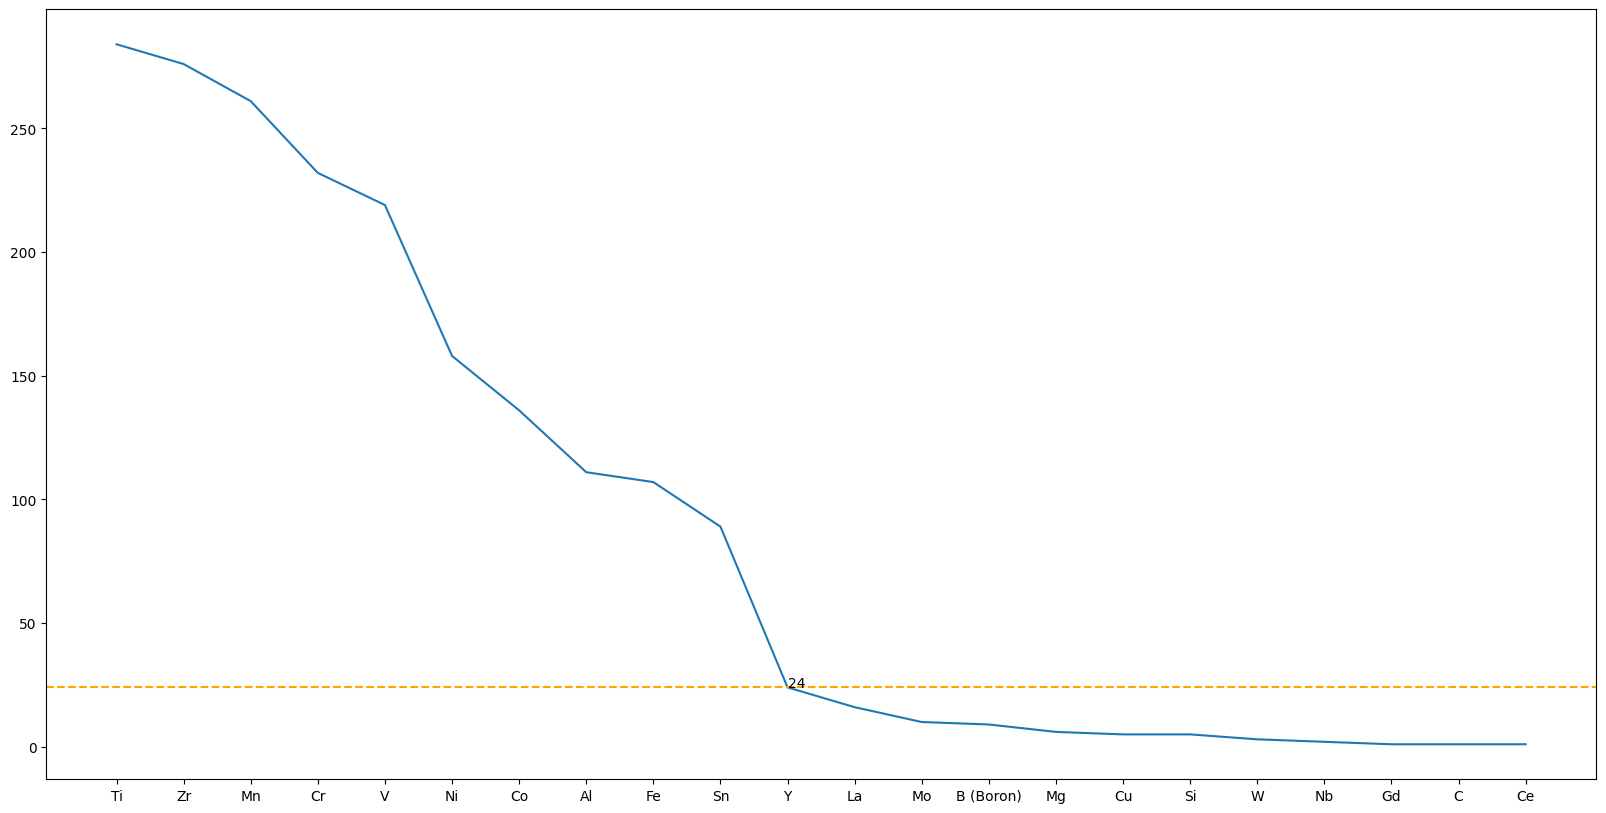

In [9]:
sample_num, feature_num = df.shape
plt.figure(figsize=(20,10))
plt.plot(sample_num - sums.sort_values())  # 查看包含各元素的化合物数量
plt.text(x='Y', y=sample_num - sums['Y'], s=314-sums['Y'])  # 在 Y 元素处标识出数量
plt.axhline(y=sample_num - sums['Y'], ls='--', c='orange')  # 在 Y 元素处绘制水平线
plt.show()

2. 分训练集和测试集

In [10]:
df

,Journal,Ti,Zr,Mn,Co,Cr,V,Ni,Sn,Al,...,Y,B,A,B/A,ΔH,ΔS,C14,C15,wt%,exothermic
0,1,1.000000,0.000000,0.850000,0.000000,1.000000,0.050000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,14.70,93.7,100.0,0.0,NaN,0.0
1,1,1.000000,0.000000,0.700000,0.000000,1.000000,0.100000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,17.70,101.0,100.0,0.0,NaN,0.0
2,1,1.000000,0.000000,0.550000,0.000000,1.000000,0.150000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,18.60,99.9,100.0,0.0,NaN,0.0
3,1,1.000000,0.000000,0.400000,0.000000,1.000000,0.200000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,20.20,103.0,100.0,0.0,NaN,0.0
4,1,0.959596,0.040404,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.0,2.0,1.0,2.0,15.10,93.0,100.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,50,0.357798,0.642202,0.132653,0.132653,0.125000,0.173469,0.522959,0.0,0.017857,...,0.0,2.0,1.0,2.0,36.82,110.0,0.0,0.0,1.27,0.0
310,50,0.356863,0.643137,0.163539,0.163539,0.152815,0.214477,0.640751,0.0,0.021448,...,0.0,2.0,1.0,2.0,36.72,110.0,0.0,0.0,1.33,0.0
311,50,0.358650,0.641350,0.146982,0.146982,0.139108,0.194226,0.577428,0.0,0.018373,...,0.0,2.0,1.0,2.0,37.03,110.0,0.0,0.0,1.38,0.0
312,50,0.360784,0.639216,0.163539,0.166220,0.155496,0.214477,0.651475,0.0,0.021448,...,0.0,2.0,1.0,2.0,34.83,110.0,0.0,0.0,1.24,0.0


In [11]:
# 划分特征与标签
X = df.iloc[:, :15].values
Y_H = df['ΔH'].values
Y_S = df['ΔS'].values
Y = df['exothermic'].values

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)



3. 建立模型

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=0,
                                  splitter="random"
                                  )  # 使用信息熵作为选择依据
clf = clf.fit(Xtrain, Ytrain) # 拟合模型
score = clf.score(Xtrain, Ytrain) # 返回预测的准确度
score


0.9954337899543378

4. 画出一棵树

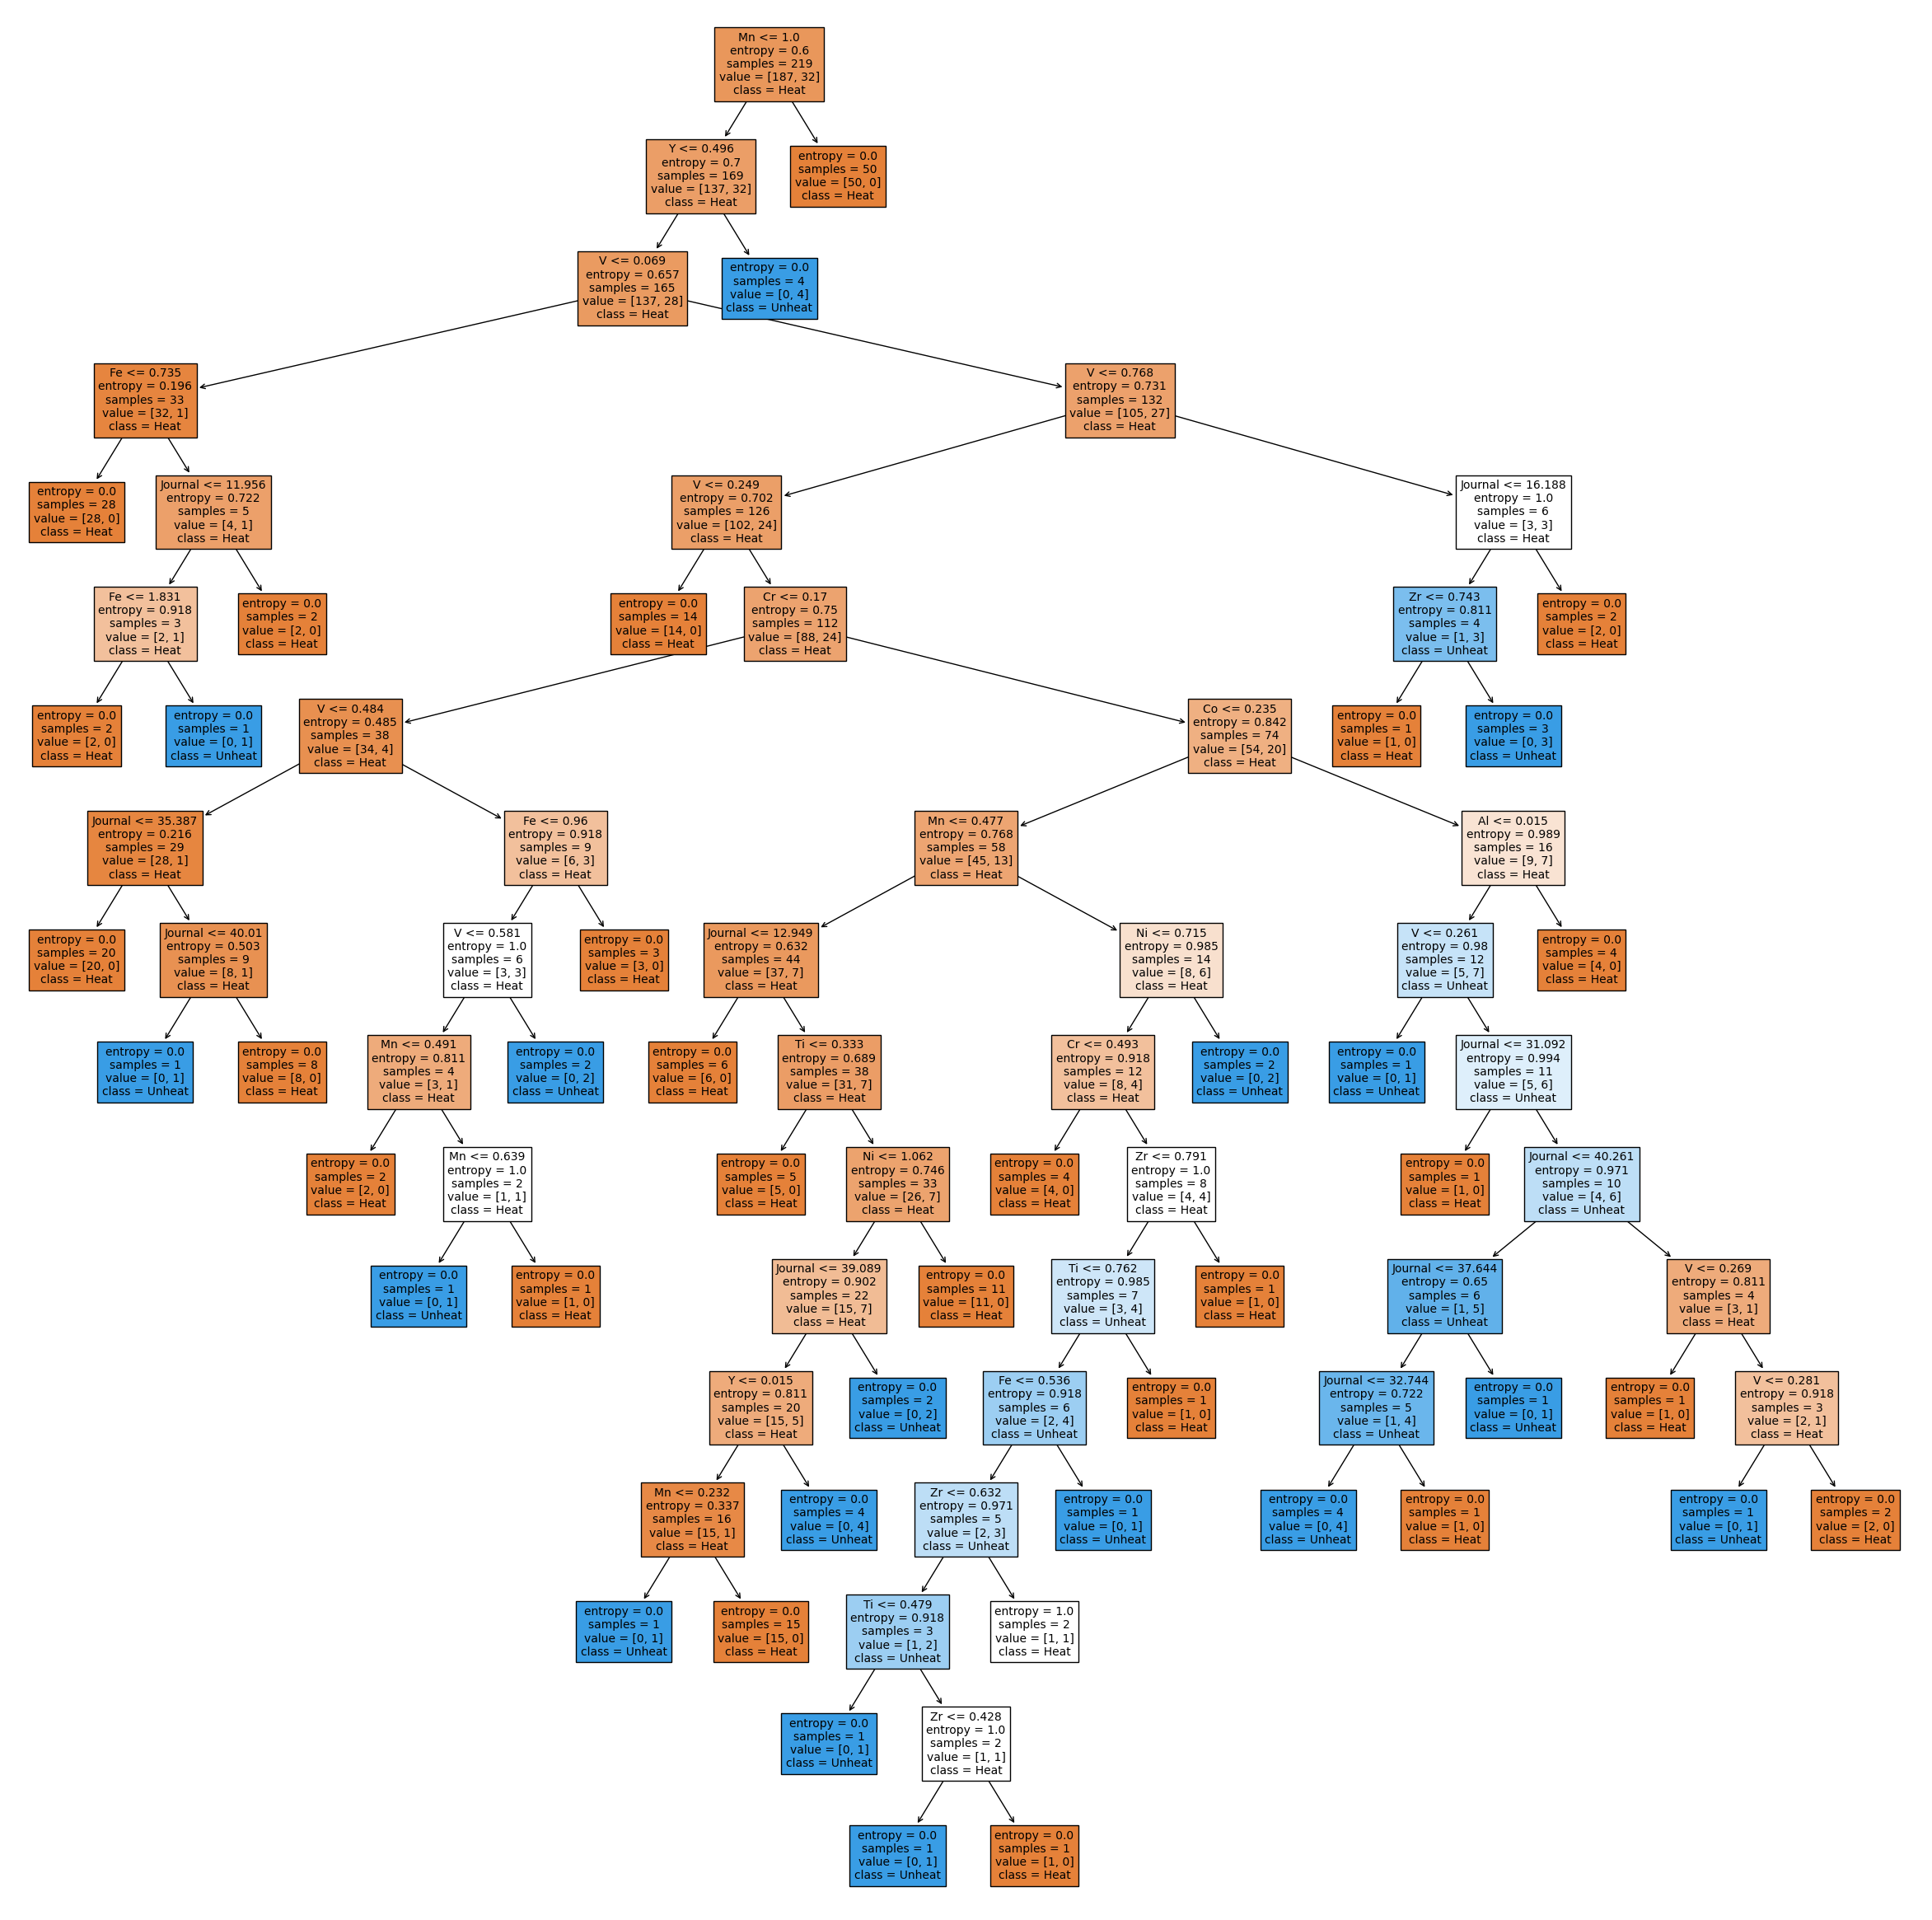

In [13]:
feature_name = df.columns[:15].to_list()
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf, fontsize=10
               ,feature_names=feature_name
               ,class_names=["Heat","Unheat"]
               ,filled=True  # 上色
               )
plt.show()

#### 2.1.2 random_state & splitter

random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。

splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性 feature_importances_ 查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能性。当然，树一旦建成，我们依然是使用剪枝参数来防止过拟合。

In [14]:
clf3 = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=3
                                  ,splitter="random"
                                 )
clf3 = clf3.fit(Xtrain, Ytrain)
score1 = clf3.score(Xtrain, Ytrain)
print(score1)
score = clf3.score(Xtest, Ytest)
print(score)


0.9954337899543378
0.8105263157894737


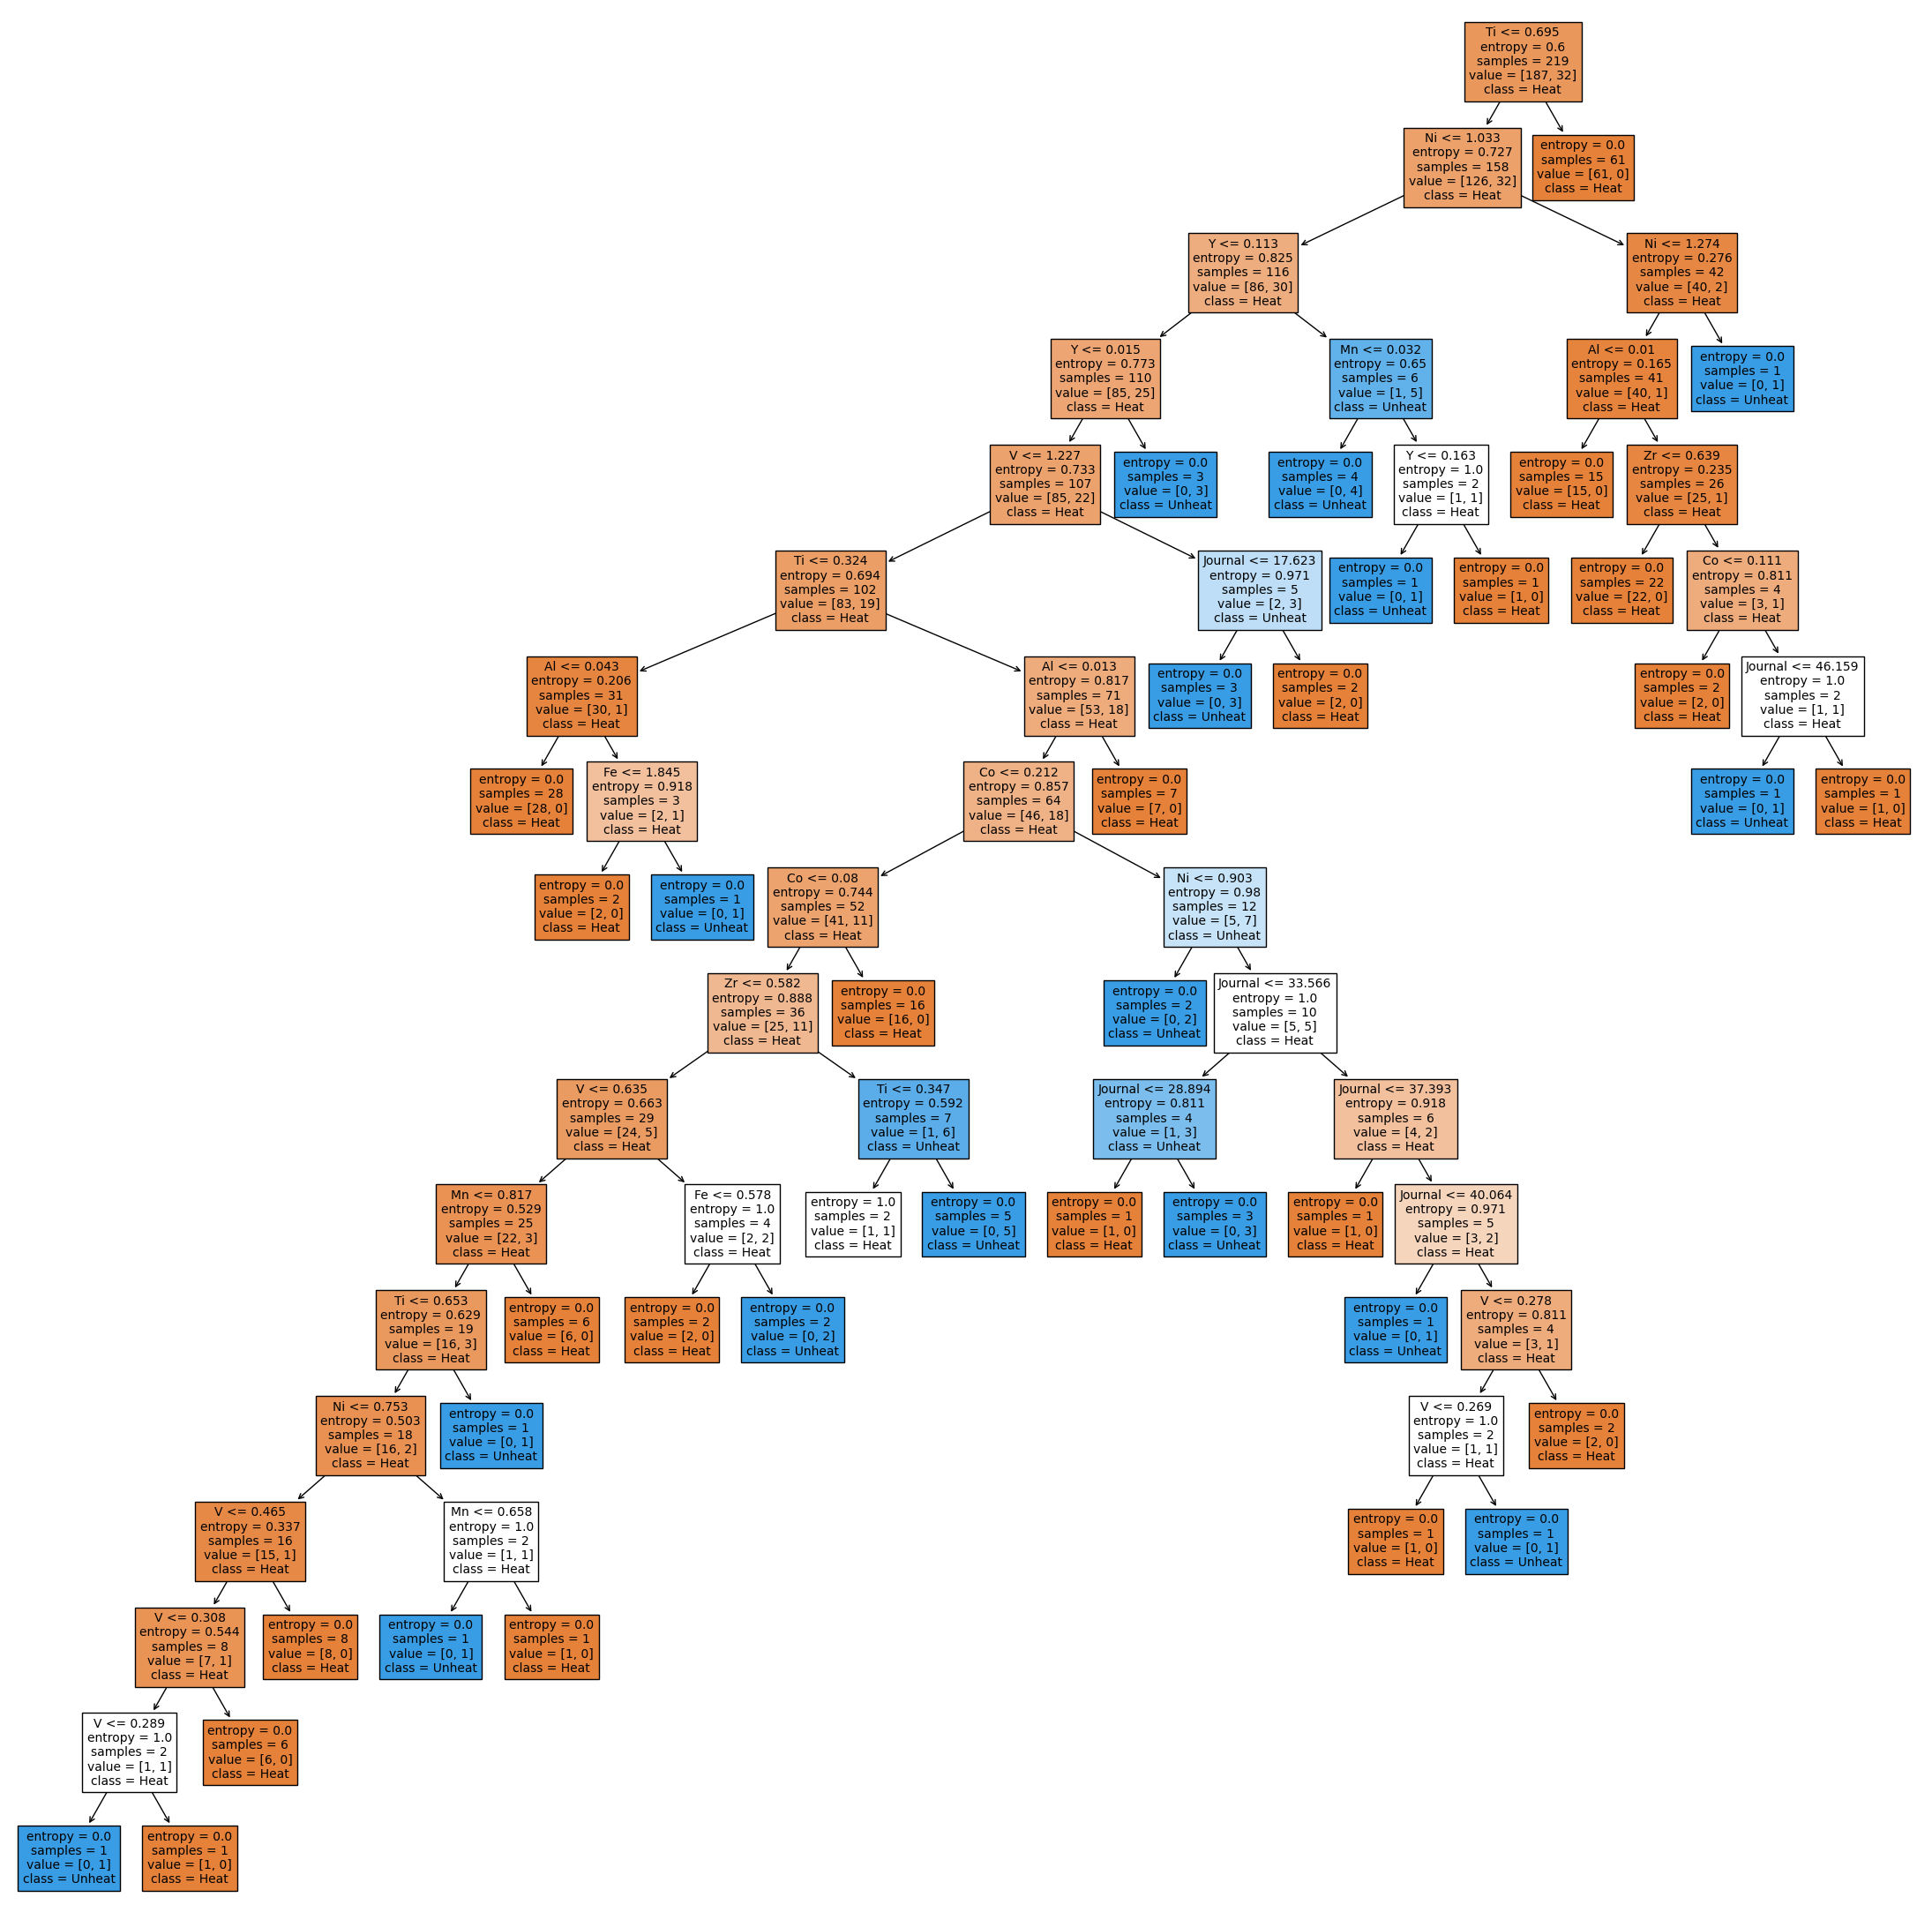

In [15]:
feature_name = df.columns[:15].to_list()
fig = plt.figure(figsize=(28,28))
tree.plot_tree(clf3, fontsize=10
               ,feature_names=feature_name
               ,class_names=["Heat","Unheat"]
               ,filled=True  # 上色
               )
plt.show()

#### 2.1.3 考虑降维

In [16]:
from sklearn.decomposition import PCA

X=Xtrain
y=Ytrain
X.shape,y.shape

((219, 15), (219,))

In [17]:
#调用pca
pca = PCA(n_components=6) #实例化
pca = pca.fit(X) #拟合模型
X_dr = pca.transform(X) #获取新矩阵
X_test_dr = pca.transform(Xtest)
#X_dr=PCA(n_components=2).fit_transform(X)
X_dr.shape #降维10维了


(219, 6)

In [18]:
clf4 = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=0,
                                  splitter="random"
                                  )
clf4 = clf4.fit(X_dr, y)
score1 = clf4.score(X_dr, y)
print(score1)
score = clf4.score(X_test_dr, Ytest)
print(score)


0.9954337899543378
0.8631578947368421


#### 2.1.4 剪枝参数

在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树往往会过拟合，这就是说， **它会在训练集上表现很好，在测试集上却表现糟糕。** 我们收集的样本数据不可能和整体的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪声，并使它对未知数据的拟合程度不足。

为了让决策树有更好的泛化性，我们要对决策树进行剪枝。 **剪枝策略对决策树的影响巨大，正确的剪枝策略是优化决策树算法的核心。** sklearn为我们提供了不同的剪枝策略：

- **max_depth**

一般 max_depth 用作树的”精修“

限制树的最大深度，超过设定深度的树枝全部剪掉

这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从 =3 开始尝试，看看拟合的效果再决定是否增加设定深度。

- **min_samples_leaf & min_samples_split**

min_samples_leaf 限定一个节点在分枝后的每个子节点都必须包含至少 min_samples_leaf 个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生

一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从 =5 开始使用。如果叶节点中含有的样本量变化很大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择。

min_samples_split 限定一个节点必须要包含至少 min_samples_split 个训练样本，这个节点才允许被分枝，否则分枝就不会发生。

- **max_features & min_impurity_decrease**

max_features 限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和max_depth异曲同工，max_features是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足。如果希望通过降维的方式防止过拟合，建议使用PCA，ICA或者特征选择模块中的降维算法。

min_impurity_decrease 限制信息增益的大小，信息增益小于设定数值的分枝不会发生。这是在0.19版本种更新的功能，在0.19版本之前时使用min_impurity_split。

The score after pruning is 0.8421052631578947


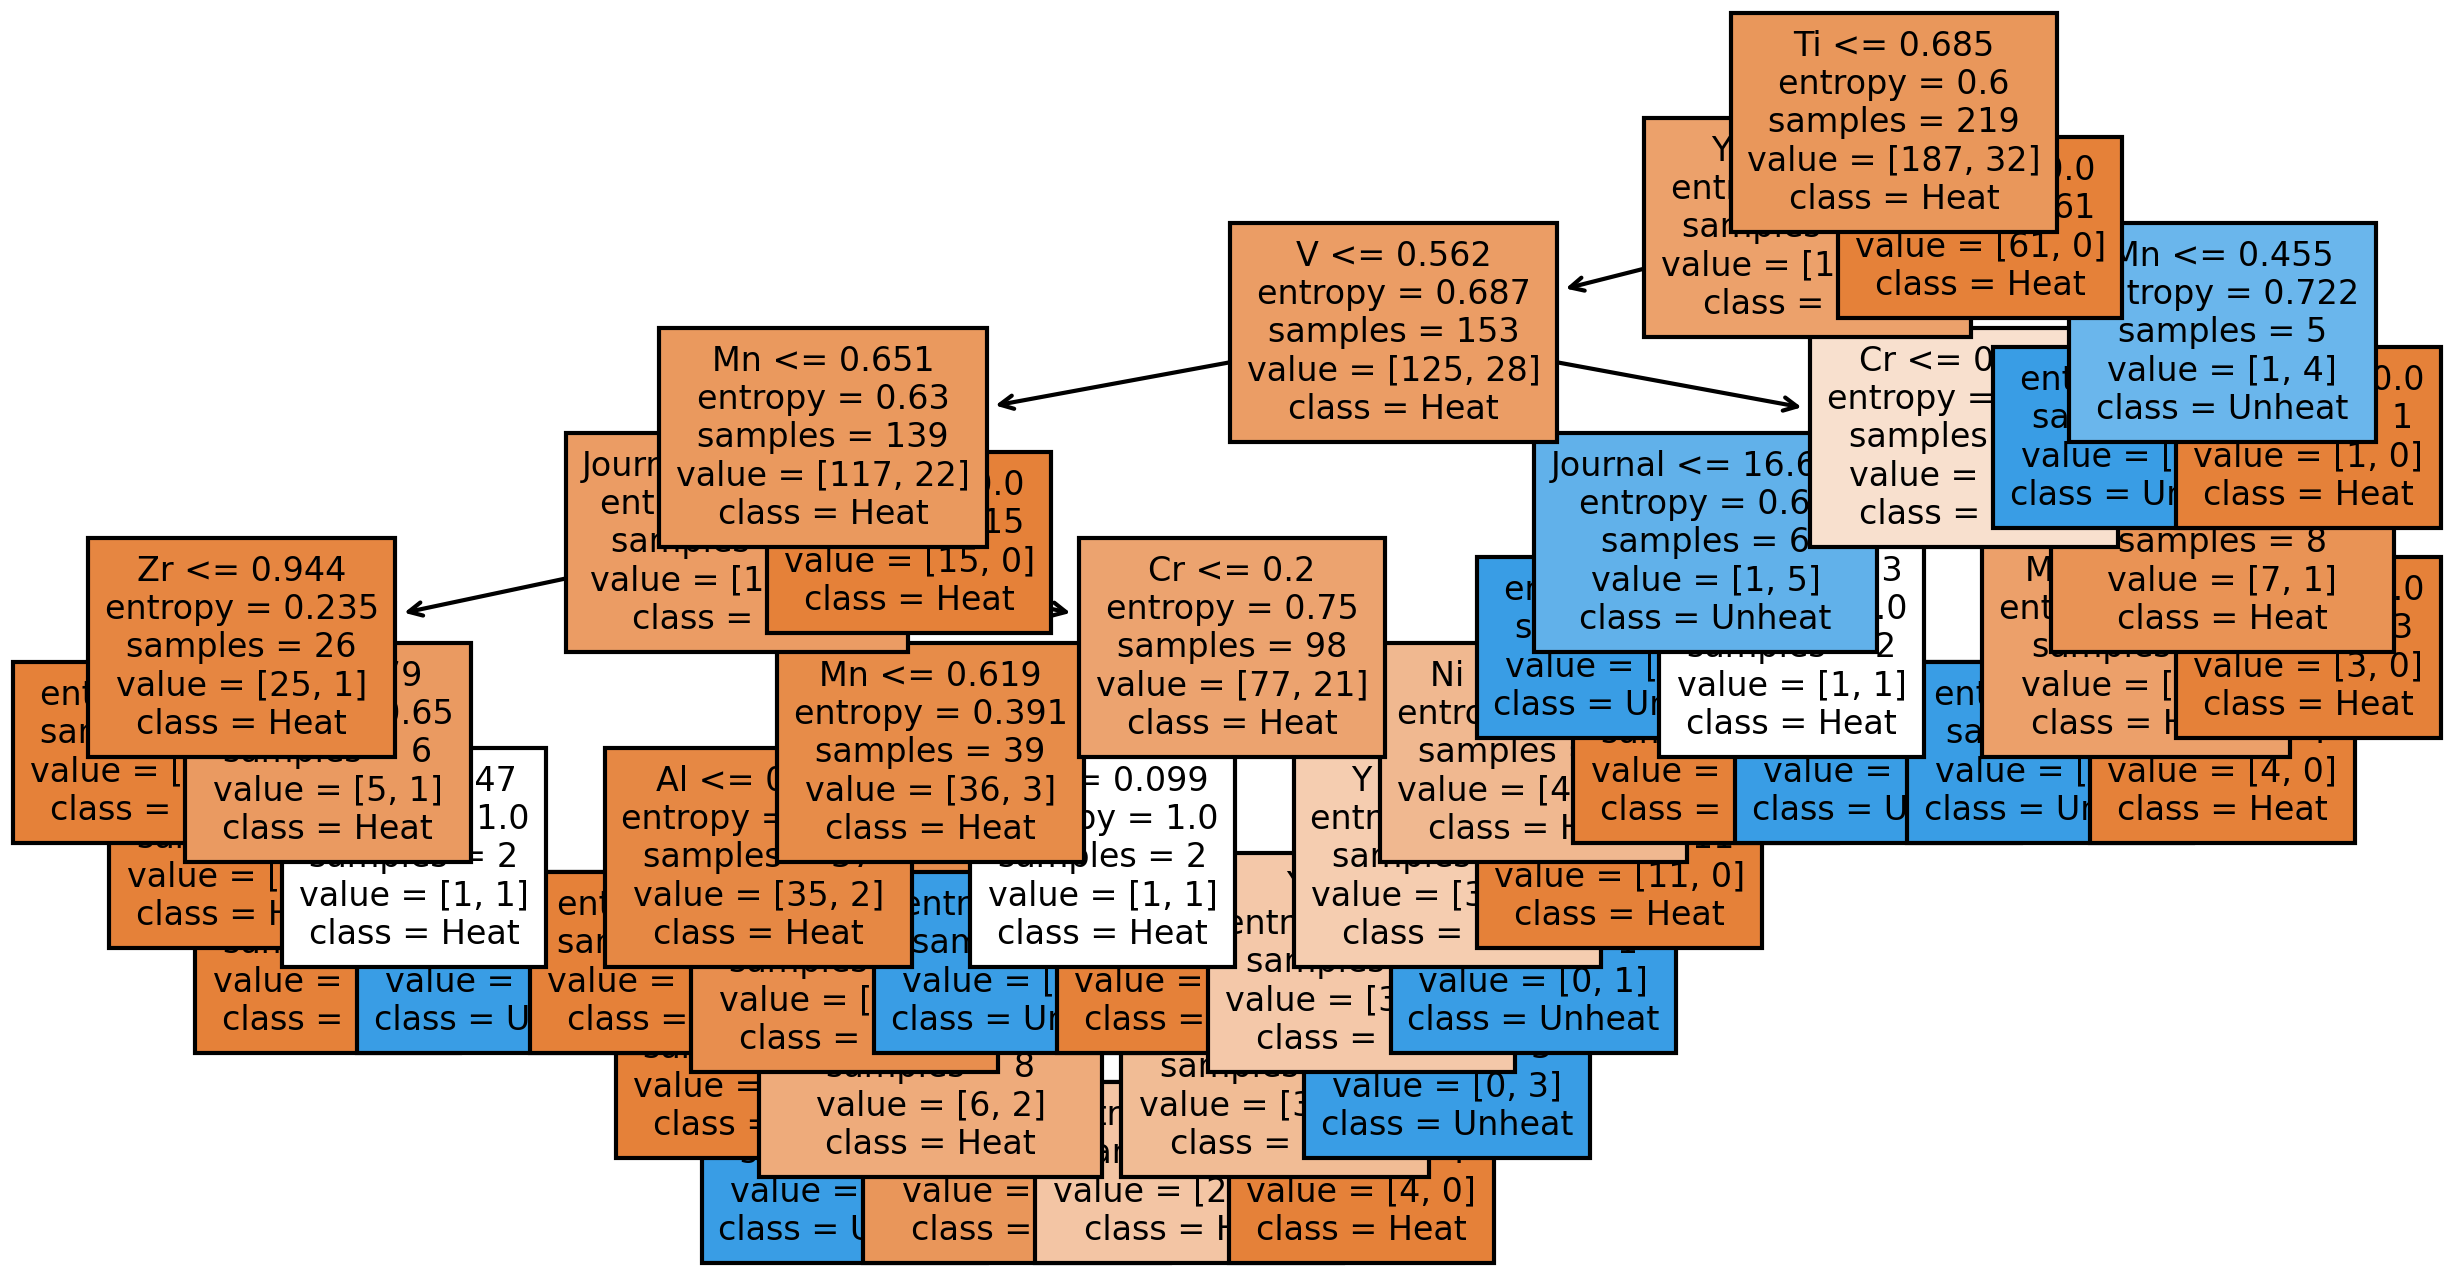

In [19]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=10
                                 )

clf = clf.fit(Xtrain, Ytrain)
print(f'The score after pruning is {clf.score(Xtest, Ytest)}')

feature_name = df.columns[:15].to_list()
fig = plt.figure(figsize=(10,5), dpi=300)
tree.plot_tree(clf 
               ,fontsize=8
               ,feature_names=feature_name
               ,class_names=["Heat","Unheat"]
               ,filled=True  # 上色
               )
plt.show()

- 确认最优的剪枝参数

怎么来确定每个参数的值呢？这时候，我们就要使用确定超参数的曲线来进行判断了，继续使用我们已经训练好的决策树模型 clf。超参数的学习曲线，是一条以超参数的取值为横坐标，模型的度量指标为纵坐标的曲线，它是用来衡量不同超参数取值下模型的表现的线。在我们建好的决策树里，我们的模型度量指标就是 score。

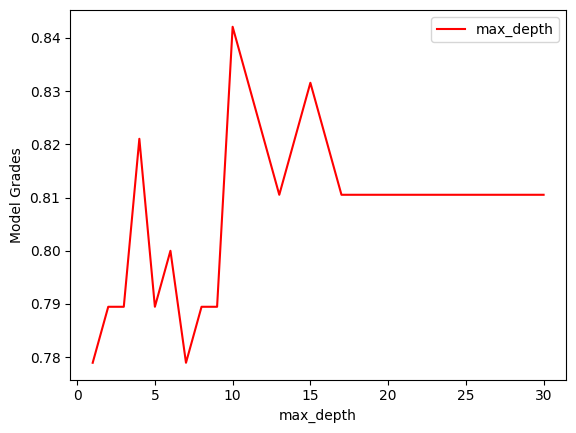

In [20]:
scores = []

for i in range(30):
    clf = tree.DecisionTreeClassifier(max_depth=i+1 ,criterion="entropy" ,random_state=30 ,splitter="random")
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    scores.append(score)

plt.plot(range(1,31), scores, color="red", label="max_depth")
plt.xlabel('max_depth')
plt.ylabel('Model Grades')
plt.legend()
plt.show()


思考：

1. 剪枝参数一定能够提升模型在测试集上的表现吗？ - 调参没有绝对的答案，一切都是看数据本身。
2. 这么多参数，一个个画学习曲线？

无论如何，剪枝参数的默认值会让树无尽地生长，这些树在某些数据集上可能非常巨大，对内存的消耗。所以如果你手中的数据集非常大，你已经预测到无论如何你都是要剪枝的，那提前设定这些参数来控制树的复杂性和大小会比较好。


##### 考虑将PCA和max_depth 融合

The score after pruning is 0.8315789473684211


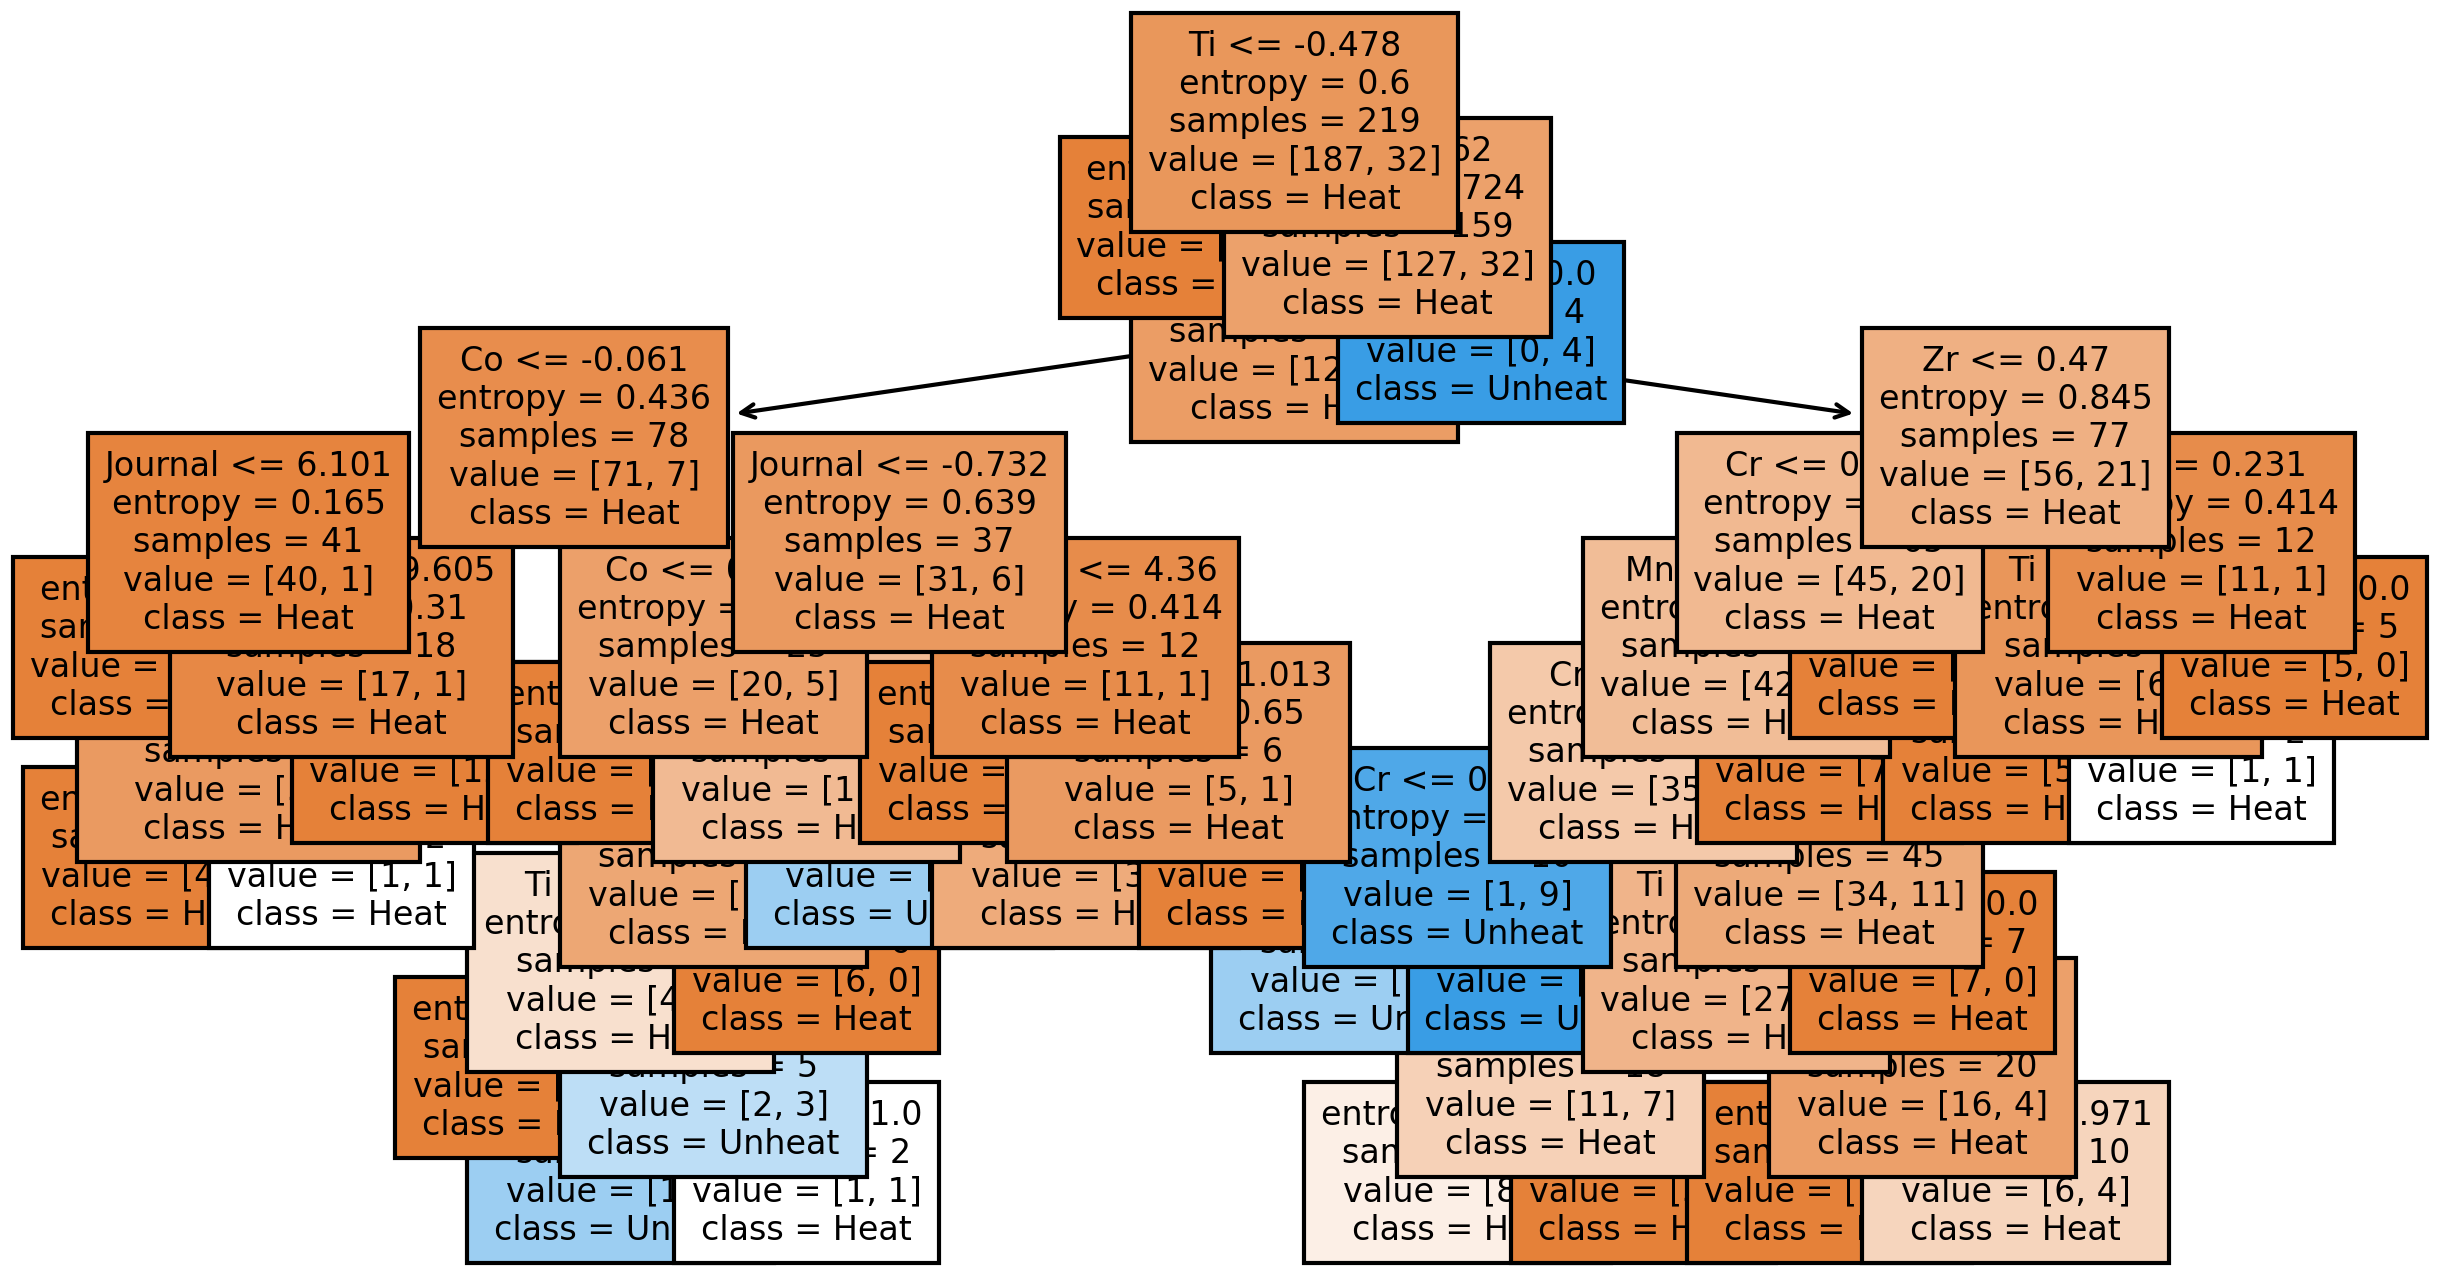

In [21]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                  ,max_depth=10
                                  ,min_samples_leaf=2
                                  ,min_samples_split=2
                                 )

clf = clf.fit(X_dr, y)
print(f'The score after pruning is {clf.score(X_test_dr, Ytest)}')

feature_name = df.columns[:15].to_list()
fig = plt.figure(figsize=(10,5), dpi=300)
tree.plot_tree(clf 
               ,fontsize=8
               ,feature_names=feature_name
               ,class_names=["Heat","Unheat"]
               ,filled=True  # 上色
               )
plt.show()

#### 2.1.5 目标权重参数

- **class_weight & min_weight_fraction_leaf**

完成样本标签平衡的参数。样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例。比如说，在银行要判断“一个办了信用卡的人是否会违约”，就是是vs否（1%：99%）的比例。这种分类状况下，即便模型什么也不做，全把结果预测成“否”，正确率也能有99%。因此我们要使用class_weight参数对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。该参数默认None，此模式表示自动给与数据集中的所有标签相同的权重。

有了权重之后，样本量就不再是单纯地记录数目，而是受输入的权重影响了，因此这时候剪枝，就需要搭配min_ weight_fraction_leaf这个基于权重的剪枝参数来使用。另请注意，基于权重的剪枝参数（例如min_weight_ fraction_leaf）将比不知道样本权重的标准（比如min_samples_leaf）更少偏向主导类。如果样本是加权的，则使用基于权重的预修剪标准来更容易优化树结构，这确保叶节点至少包含样本权重的总和的一小部分。

### 2.2 重要属性和接口

属性是在模型训练之后，能够调用查看的模型的各种性质。对决策树来说，最重要的是 feature_importances_，能够查看各个特征对模型的重要性。

sklearn中许多算法的接口都是相似的，比如说我们之前已经用到的 fit 和 score，几乎对每个算法都可以使用。除了这两个接口之外，决策树最常用的接口还有 apply 和 predict。apply 中输入测试集返回每个测试样本所在的叶子节点的索引，predict输入测试集返回每个测试样本的标签。返回的内容一目了然并且非常容易，大家自己下去试试看。

In [22]:
clf = tree.DecisionTreeClassifier(max_depth=6 ,criterion="gini" ,random_state=30 ,splitter="random")
clf = clf.fit(Xtrain, Ytrain)

In [23]:
clf.feature_importances_

array([0.14292216, 0.16433898, 0.0121381 , 0.14565721, 0.        ,
       0.14565721, 0.08459588, 0.07192949, 0.        , 0.        ,
       0.        , 0.23276096, 0.        , 0.        , 0.        ])

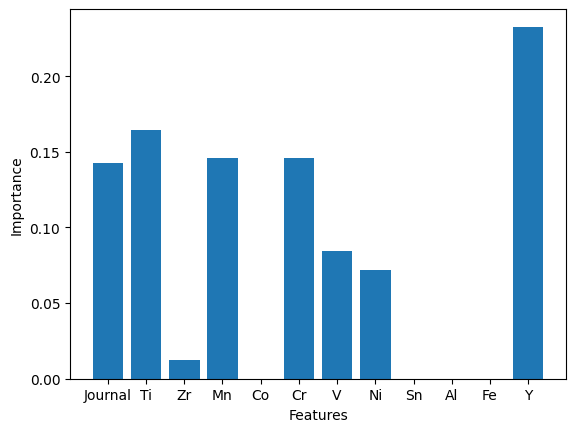

In [24]:
plt.bar(x=df.iloc[:, :12].columns, height=clf.feature_importances_[:12])
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [25]:
pd.DataFrame(clf.feature_importances_, columns=['Importance'], index=df.iloc[:, :15].columns).sort_values('Importance', ascending=False)

,Importance
Y,0.232761
Ti,0.164339
Cr,0.145657
Mn,0.145657
Journal,0.142922
V,0.084596
Ni,0.071929
Zr,0.012138
Co,0.000000
Sn,0.000000


结果中 B 为 AB2 合金中 B 的比例，A 为 AB2 合金中 A 的比例，一般皆为 1:2

**Journal 表现出较为靠前的重要性，表明对于实验数据，不同的文献来源可能会引起较大的偏差。**

In [26]:
# apply返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([ 6,  9,  9,  9,  9, 22, 22, 22,  9, 10,  6, 10, 22,  9,  9, 22, 22,
        9,  6,  9,  9,  6,  9, 22,  9, 22,  9,  6,  6, 22, 10,  9, 22,  9,
       22, 18, 22,  6,  9, 18,  9,  9, 22, 10,  9,  6, 22,  9, 10, 22, 22,
       22, 14,  9,  6,  6,  9,  9,  9, 22, 22,  7, 22,  6,  7,  9,  9,  9,
        6, 22,  9, 10, 22,  9, 10,  9,  9, 17, 10,  9,  9, 20,  9,  9,  7,
        9,  6,  6,  9, 10,  9, 17, 22,  7, 22], dtype=int64)

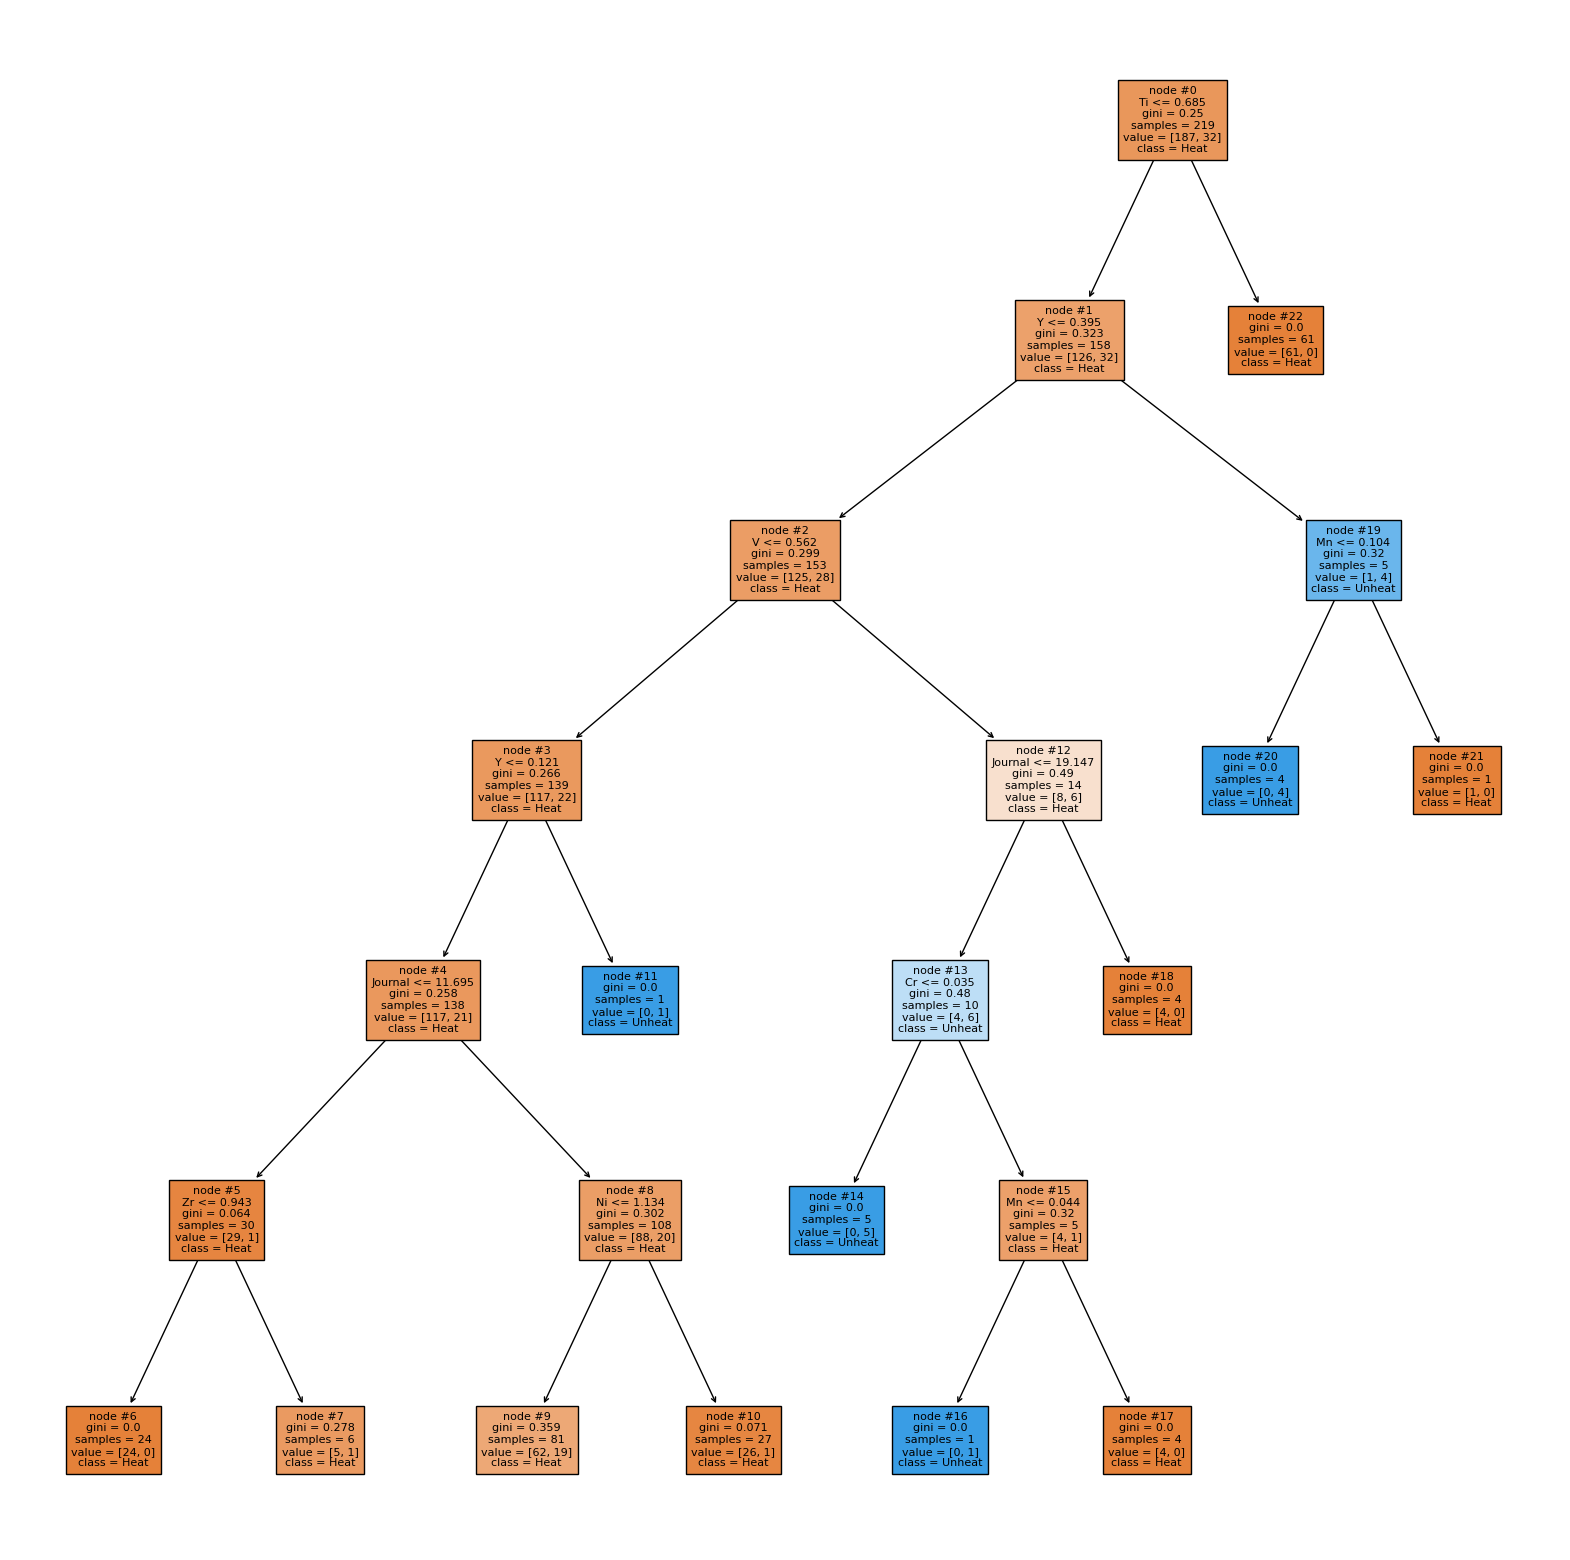

In [27]:
fig = plt.figure(figsize=(20,20))
tree.plot_tree(clf 
               ,fontsize=8
               ,feature_names=feature_name
               ,class_names=["Heat","Unheat"]
               ,filled=True  # 上色
               ,node_ids = True
               )
plt.show()

In [28]:
# predict返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])